# Keypoint Detection and Matching

In [3]:
# Dependencies
import numpy as np 
from matplotlib import pyplot as plt
import cv2
print("CV2 version: ", cv2.__version__)

CV2 version:  4.0.1


## Load Images

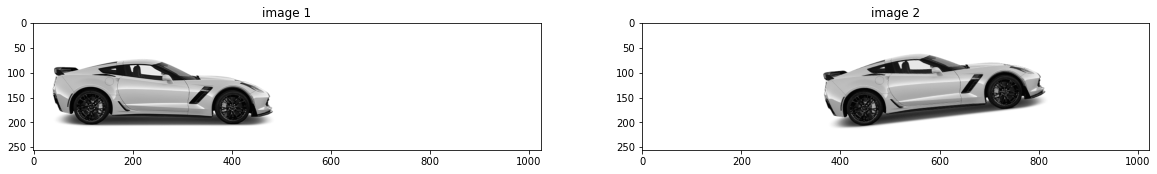

In [14]:
# Load query and train image
image_1 = cv2.imread("Images/Corvette_Frame_1.jpg", cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread("Images/Corvette_Frame_N.jpg", cv2.IMREAD_GRAYSCALE)

f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,20))
ax1.set_title("image 1")
ax1.imshow(image_1, cmap="gray")
ax2.set_title("image 2")
ax2.imshow(image_2, cmap="gray")



## Get and display keypoints (with ORB Detector)

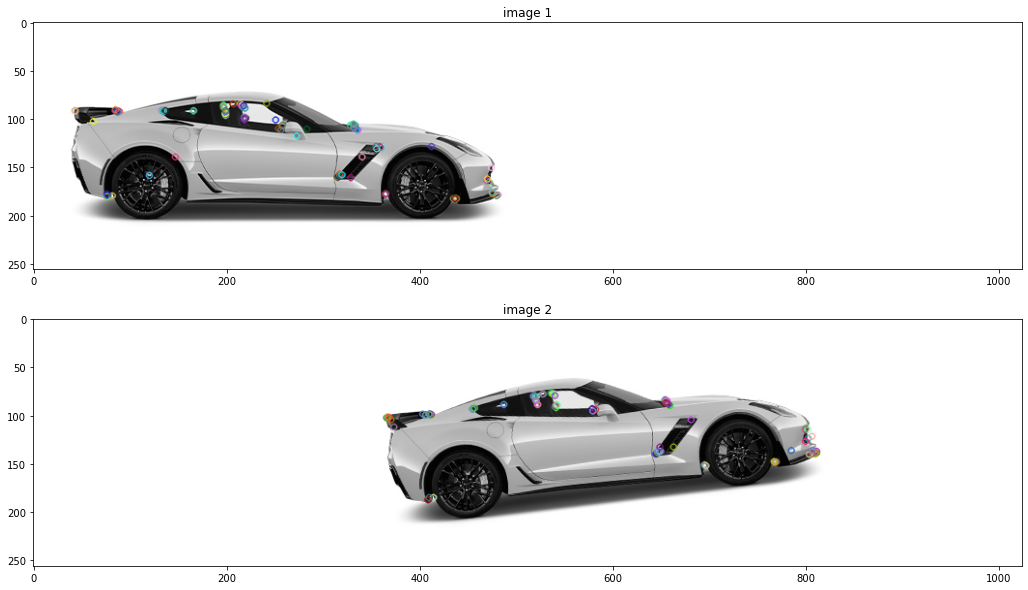

In [16]:
# Initiate ORB Keypoint detector
orb = cv2.ORB_create(nfeatures=100)

# Get keypoints
kp_orb_1 = orb.detect(image_1, None)
kp_orb_2 = orb.detect(image_2, None)

# Draw keypoints
img_kp_1 = cv2.drawKeypoints(image_1, kp_orb_1, None)
img_kp_2 = cv2.drawKeypoints(image_2, kp_orb_2, None)

# Display keypoints
f, (ax1, ax2) = plt.subplots(2,1, figsize = (40,10))
ax1.set_title("image 1")
ax1.imshow(img_kp_1, cmap="gray")
ax2.set_title("image 2")
ax2.imshow(img_kp_2, cmap="gray")

# keypoints_1, decriptors_1 = orb.detectAndCompute(image_1, None)
# keypoints_2, decriptors_2 = orb.detectAndCompute(image_2, None)


## Compute Descriptors

In [18]:
# Compute ORB Descriptors
kp_orb_1, desc_orb_1 = orb.compute(image_1, kp_orb_1)
kp_orb_2, desc_orb_2 = orb.compute(image_2, kp_orb_2)


## Match Keypoints (Brute Force Matches) and Display 

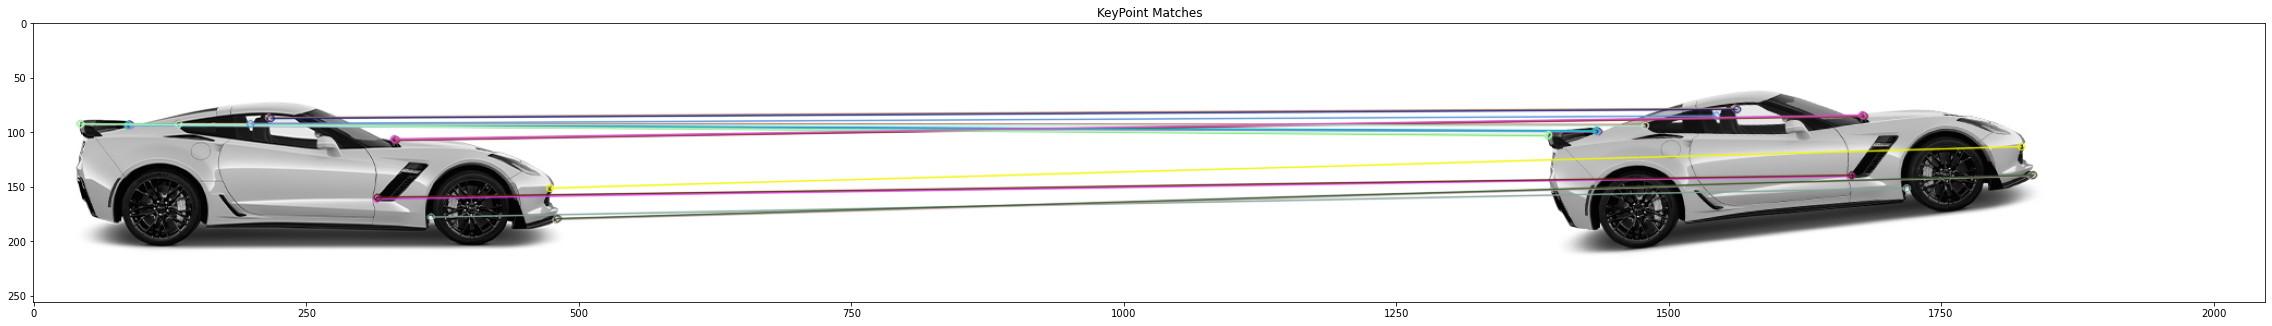

In [29]:
# Create Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(desc_orb_1, desc_orb_2)

# Sort them based on distance
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 20 matches
img_matches = cv2.drawMatches(image_1, kp_orb_1, image_2, kp_orb_2, matches[:20], None, flags=2)

f, ax = plt.subplots(figsize=(40,20))
ax.set_title("KeyPoint Matches")
ax.imshow(img_matches, cmap="gray")

cv2.imshow("KeyPoint Matches", img_matches)
cv2.waitKey()
cv2.destroyAllWindows()
